#1. Installation and Imports

In [ ]:
# Install necessary libraries
!pip install tensorflow numpy matplotlib

# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential, load_model


#2. Loading the Dataset (Sample Images)

In [15]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to the sample images folder
sample_img_folder = '/content/sample_data/Sample_dataset_img'

# Check the sample images
sample_images = os.listdir(sample_img_folder)
print(f"Total sample images: {len(sample_images)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total sample images: 1162


#3.Model Preparation and Training

In [ ]:
# Generator model
generator = Sequential([
    Dense(256, input_dim=100, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(784, activation='sigmoid'),
    Reshape((28, 28, 1))
])

# Discriminator model
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Combined model (GAN)
gan = Sequential([generator, discriminator])

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the GAN
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')


#4.Training the GAN

In [ ]:
# Function to train the GAN
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        for _ in range(len(sample_images) // batch_size):
            # Generate random noise as input for the generator
            noise = np.random.normal(0, 1, (batch_size, 100))
            generated_images = generator.predict(noise)

            # Get a random batch of real images
            idx = np.random.randint(0, len(sample_images), batch_size)
            real_images = []
            for i in idx:
                img_path = os.path.join(sample_img_folder, sample_images[i])
                img = plt.imread(img_path)
                real_images.append(img)
            real_images = np.array(real_images)

            # Train the discriminator
            d_loss_real = discriminator.train_on_batch(real_images, np.ones(batch_size))
            d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros(batch_size))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train the generator (via the GAN model)
            noise = np.random.normal(0, 1, (batch_size, 100))
            g_loss = gan.train_on_batch(noise, np.ones(batch_size))

        print(f"Epoch: {epoch + 1}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")


#5.Generating and Visualizing New Art

1/1 [==============================] - 0s 223ms/step


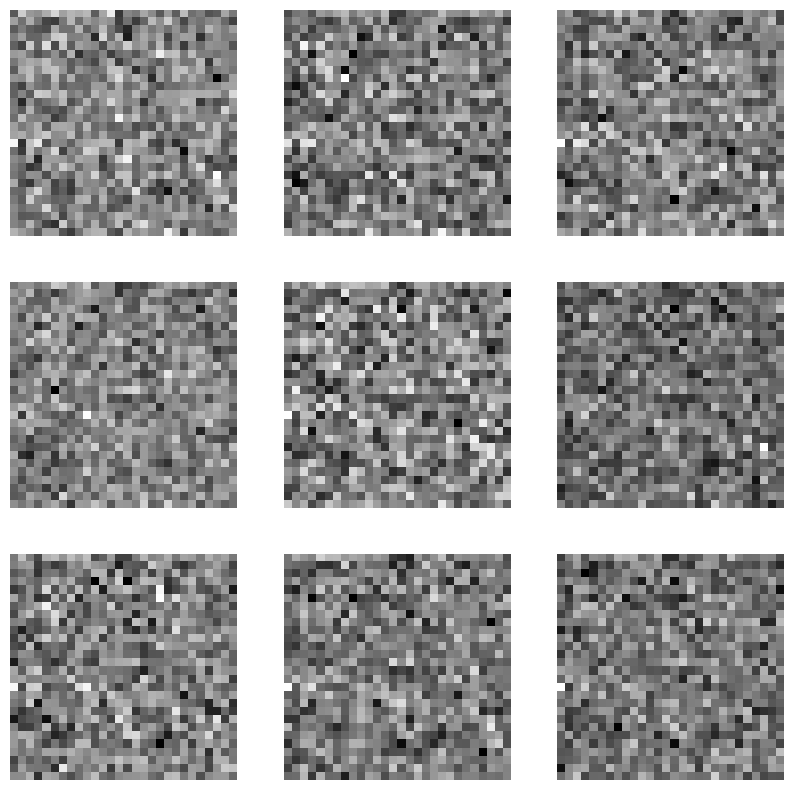

In [17]:
# Function to generate new art
def generate_art(num_images):
    noise = np.random.normal(0, 1, (num_images, 100))
    generated_images = generator.predict(noise)
    return generated_images

# Generate new art
num_images_to_generate = 9
generated_images = generate_art(num_images_to_generate)

# Visualize the generated images
plt.figure(figsize=(10, 10))
for i in range(num_images_to_generate):
    plt.subplot(3, 3, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


#6.Saving and Loading the Model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 102ms/step


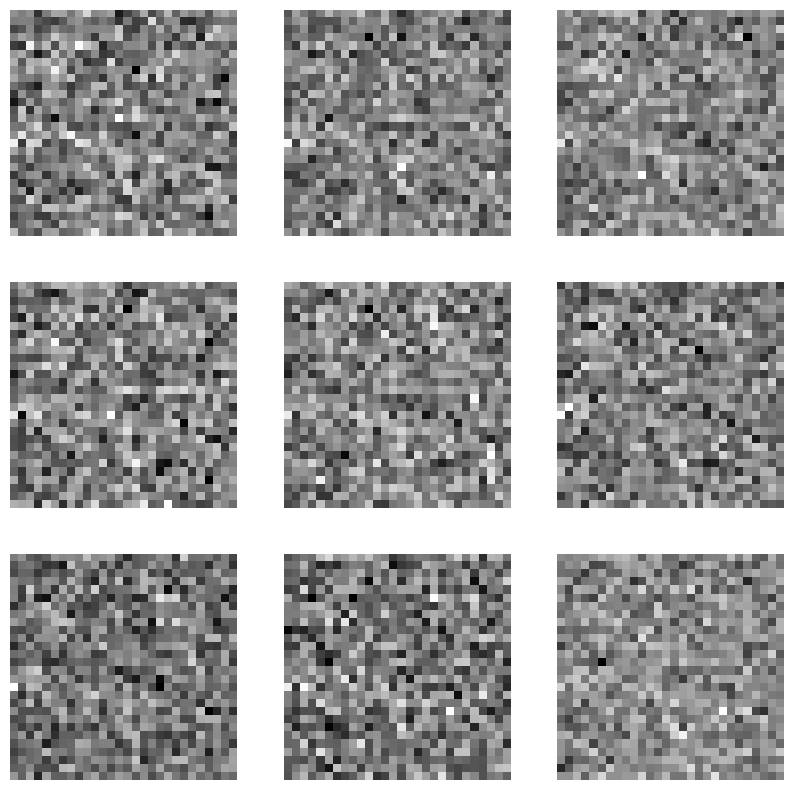

In [ ]:
# Save the generator model
generator.save('generator_model.h5')

# Load the generator model
generator = load_model('generator_model.h5')

# Function to generate new art using the loaded model
def generate_art_with_loaded_model(num_images):
    noise = np.random.normal(0, 1, (num_images, 100))
    generated_images = generator.predict(noise)
    return generated_images

# Generate new art with the loaded model
num_images_to_generate = 9
generated_images = generate_art_with_loaded_model(num_images_to_generate)

# Visualize the generated images
plt.figure(figsize=(10, 10))
for i in range(num_images_to_generate):
    plt.subplot(3, 3, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
